In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display  # Permet un affichage plus propre dans Jupyter Notebook

# Charger les données
chemin_fichier = "Data/dpe-v2-tertiaire.csv"
data = pd.read_csv(chemin_fichier)

# Affichage du nombre de lignes dans le DataFrame
print(f"Nombre de lignes dans le DataFrame : {data.shape[0]}")


Nombre de lignes dans le DataFrame : 366157


In [48]:
# 🔍 Aperçu des premières lignes sous forme de tableau stylisé
print("🔍 Aperçu des données :")
display(data.head().style.set_properties(**{
    'background-color': '#f4f4f4',
    'border': '1px solid black',
    'color': 'black',
    'text-align': 'center'
}))


🔍 Aperçu des données :


,N°DPE,Date_réception_DPE,Date_établissement_DPE,Date_visite_diagnostiqueur,Modèle_DPE,N°_DPE_remplacé,Date_fin_validité_DPE,Version_DPE,N°_DPE_immeuble_associé,Méthode_du_DPE,N°_immatriculation_copropriété,Invariant_fiscal_logement,Etiquette_DPE,Etiquette_GES,Conso_kWhep/m²/an,Emission_GES_kgCO2/m²/an,Année_construction,Catégorie_ERP,Période_construction,Secteur_activité,Nombre_occupant,Surface_(SHON),Surface_utile,Type_énergie_principale_chauffage,Adresse_brute,Nom__commune_(BAN),Code_INSEE_(BAN),N°_voie_(BAN),Identifiant__BAN,Adresse_(BAN),Code_postal_(BAN),Score_BAN,Nom__rue_(BAN),Coordonnée_cartographique_X_(BAN),Coordonnée_cartographique_Y_(BAN),Code_postal_(brut),N°_étage_appartement,Nom_résidence,Complément_d'adresse_bâtiment,Cage_d'escalier,Complément_d'adresse_logement,Statut_géocodage,Nom__commune_(Brut),N°_département_(BAN),N°_région_(BAN),Conso_é_finale_énergie_n°1,Conso_é_primaire_énergie_n°1,Type_énergie_n°1,Type_usage_énergie_n°1,Frais_annuel_énergie_n°1,Année_relève_conso_énergie_n°1,Conso_é_finale_énergie_n°2,Conso_é_primaire_énergie_n°2,Type_énergie_n°2,Type_usage_énergie_n°2,Frais_annuel_énergie_n°2,Année_relève_conso_énergie_n°2,Conso_é_finale_énergie_n°3,Conso_é_primaire_énergie_n°3,Type_énergie_n°3,Type_usage_énergie_n°3,Frais_annuel_énergie_n°3,Année_relève_conso_énergie_n°3
0,2363T1680837R,2023-05-23,2023-05-22,2023-05-11,DPE 2006 tertiaire et ERP,nan,2033-05-21,2.200000,nan,dpe tertiaire vierge,nan,nan,nan,nan,nan,nan,1988.000000,5ème Catégorie,1983-1988,"W : Administrations, banques, bureaux",0.000000,91.600000,100.000000,nan,24 TER AVENUE D'AUBIÈRE,Cournon-d'Auvergne,63124,24ter,63124_0035_00024_ter,24ter avenue d'Aubière 63800 Cournon-d'Auvergne,63800.000000,0.830000,avenue d'Aubière,712942.360000,6516058.350000,63800,0.000000,nan,002ER459997,nan,nan,adresse non géocodée ban car aucune correspondance trouvée,COURNON-D'AUVERGNE,63,84.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2269T2615953W,2022-11-05,2022-11-04,2022-10-19,DPE 2006 tertiaire et ERP,nan,2032-11-03,2.200000,nan,dpe tertiaire facture,nan,nan,C,C,159.300000,23.800000,1979.000000,5ème Catégorie,1978-1982,U : Établissements de soins,0.000000,135.900000,100.000000,nan,707 route de la Condamine CENTRE MEDICAL GERMAINE REVEL,Chabanière,69228,707,69228_0086_00707,707 Route de la Condamine 69440 Chabanière,69440.000000,0.510000,Route de la Condamine,828010.810000,6499110.540000,69440,0.000000,nan,041122/56101,nan,nan,adresse géocodée ban à l'adresse,CHABANIERE,69,84.000000,14565.800000,14565.800000,Gaz naturel,périmètre de l'usage inconnu,1620.000000,2021.000000,4024.000000,9255.200000,Électricité,périmètre de l'usage inconnu,1167.000000,2021.000000,nan,nan,nan,nan,nan,nan
2,2357T4209637Z,2023-12-07,2023-12-06,2023-12-06,DPE 2006 tertiaire et ERP,nan,2033-12-05,2.300000,nan,dpe tertiaire vierge dans un bâtiment de logement,nan,nan,nan,nan,nan,nan,nan,5ème Catégorie,1948-1974,"M : Magasins de vente, centres commerciaux",0.000000,74.600000,100.000000,nan,4 rue de France,Phalsbourg,57540,4,57540_0300_00004,4 Rue de France 57370 Phalsbourg,57370.000000,0.520000,Rue de France,1012776.320000,6860453.930000,57370,0.000000,nan,2023-RW-209-SCI MAVI,nan,RDC,adresse géocodée ban à l'adresse,PHALSBOURG,57,44.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2404T3934296Y,2024-11-07,2024-11-06,2024-07-29,DPE 2006 tertiaire et ERP,2404T3934235P,2034-11-05,2.400000,nan,dpe tertiaire facture,nan,nan,B,A,66.000000,1.800000,1990.000000,nan,1989-2000,autres tertiaires non ERP,500.000000,nan,1208.000000,nan,04100 avenue du Languedoc,Sainte-Tulle,04197,nan,04197_0231,Avenue du Languedoc 04220 Sainte-Tulle,4220.000000,0.740000,Avenue du Languedoc,923354.370000,6303377.930000,4220,nan,ZA LES BASTIDES BLANCHES,nan,nan,nan,adresse géocodée ban à l'adresse,SAINTE-TULLE,04,93.000000,37562.000000,86392.600000,Électricité,périmètre de l'usage inconnu,7136.000000,2024.000000,nan,nan,nan,nan,nan,nan,nan,nan

In [56]:
df.columns

Index(['N°DPE', 'Date_réception_DPE', 'Date_établissement_DPE',
       'Date_visite_diagnostiqueur', 'Modèle_DPE', 'N°_DPE_remplacé',
       'Date_fin_validité_DPE', 'Version_DPE', 'N°_DPE_immeuble_associé',
       'Méthode_du_DPE', 'N°_immatriculation_copropriété',
       'Invariant_fiscal_logement', 'Etiquette_DPE', 'Etiquette_GES',
       'Conso_kWhep/m²/an', 'Emission_GES_kgCO2/m²/an', 'Année_construction',
       'Catégorie_ERP', 'Période_construction', 'Secteur_activité',
       'Nombre_occupant', 'Surface_(SHON)', 'Surface_utile',
       'Type_énergie_principale_chauffage', 'Adresse_brute',
       'Nom__commune_(BAN)', 'Code_INSEE_(BAN)', 'N°_voie_(BAN)',
       'Identifiant__BAN', 'Adresse_(BAN)', 'Code_postal_(BAN)', 'Score_BAN',
       'Nom__rue_(BAN)', 'Coordonnée_cartographique_X_(BAN)',
       'Coordonnée_cartographique_Y_(BAN)', 'Code_postal_(brut)',
       'N°_étage_appartement', 'Nom_résidence',
       'Complément_d'adresse_bâtiment', 'Cage_d'escalier',
       'Compléme

In [60]:
df = data.copy()

In [113]:
df["Période_construction"].unique()

array(['avant 1948', '1989-2000', '2006-2012', '1983-1988', '1948-1974',
       '2001-2005', '1978-1982', '2013-2021', 'après 2021', '1975-1977'],
      dtype=object)

###### Identification et surpression des doublons

In [62]:
### suppression des doublons simple 
df  = df.drop_duplicates().reset_index(drop =True)

In [63]:
######  Filtrer tous les DPE dont le numero_dpe (N° DPE) apparaît dans dpe_a_remplacer (N° DPE remplacé). 
###### Si un DPE a été remplacé par un autre, alors l'ancien DPE est un doublon et peut être supprimé.
df = df[~df["N°DPE"].isin(df["N°_DPE_remplacé"].dropna())]

In [66]:
### Identifier les doublons en fonction des critères donnés
# Définition des colonnes à utiliser pour détecter les doublons
critères = [
    "Adresse_(BAN)",  
    "Date_visite_diagnostiqueur",  
    "Surface_utile",  
    "Méthode_du_DPE",  
    "Complément_d'adresse_logement"  
]

# Trouver les doublons
df.loc[:, "est_doublon"] = df.duplicated(subset=critères, keep=False)

# Suppression des doublons en gardant la version la plus récente (selon la date de visite du diagnostiqueur)
df = df.sort_values(by="Date_visite_diagnostiqueur", ascending=False).drop_duplicates(subset=critères, keep="first")


In [95]:
df.drop("est_doublon", axis = 1, inplace = True)

In [68]:
df.shape

(334804, 64)

In [70]:
# 📊 Infos générales sur le dataset
print("\n📊 Infos générales :")
df_info = pd.DataFrame({
    "Nom de colonne": df.columns,
    "Type de données": df.dtypes,
    "Valeurs manquantes (%)": (df.isnull().sum() / len(df)) * 100,
    "Nombre de valeurs uniques": df.nunique()
})
display(df_info.style.set_properties(**{
    'background-color': '#e6f2ff',
    'border': '1px solid black',
    'color': 'black',
    'text-align': 'center'
}))


📊 Infos générales :


,Nom de colonne,Type de données,Valeurs manquantes (%),Nombre de valeurs uniques
N°DPE,N°DPE,object,0.000000,334804
Date_réception_DPE,Date_réception_DPE,object,0.000000,1298
Date_établissement_DPE,Date_établissement_DPE,object,0.000000,1299
Date_visite_diagnostiqueur,Date_visite_diagnostiqueur,object,0.000000,1299
Modèle_DPE,Modèle_DPE,object,0.000000,1
N°_DPE_remplacé,N°_DPE_remplacé,object,92.497401,25119
Date_fin_validité_DPE,Date_fin_validité_DPE,object,0.000000,1298
Version_DPE,Version_DPE,float64,0.000000,7
N°_DPE_immeuble_associé,N°_DPE_immeuble_associé,object,99.691163,132
Méthode_du_DPE,Méthode_du_DPE,object,2.070166,8


In [86]:
df[["Type_énergie_n°1","Type_énergie_n°2","Type_énergie_n°3","Année_relève_conso_énergie_n°1","Année_relève_conso_énergie_n°2","Année_relève_conso_énergie_n°3"]]

,Type_énergie_n°1,Type_énergie_n°2,Type_énergie_n°3,Année_relève_conso_énergie_n°1,Année_relève_conso_énergie_n°2,Année_relève_conso_énergie_n°3
115196,Électricité,Électricité,NaN,2022.0,2023.0,NaN
38374,Électricité,Électricité,NaN,2020.0,2021.0,NaN
200029,NaN,NaN,NaN,NaN,NaN,NaN
212177,NaN,NaN,NaN,NaN,NaN,NaN
212827,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
26060,Électricité,NaN,NaN,2021.0,NaN,NaN
145830,Électricité,NaN,NaN,2001.0,NaN,NaN
43378,Gaz naturel,NaN,NaN,0.0,NaN,NaN
43400,Gaz naturel,Électricité,NaN,2017.0,2017.0,NaN


In [90]:
df["Nom_résidence"].unique()

array(['Bâtiment', 'Epicentre lot 5', nan, ...,
       'Bâtiment Génie Biologique', 'Bâtiment Génie Civil',
       'MAISON D’ARRET DE MULHOUSE'], dtype=object)

In [8]:
# 📈 Statistiques descriptives (uniquement pour les colonnes numériques)
print("\n📈 Statistiques descriptives :")
display(df.describe().T.style.set_properties(**{
    'background-color': '#fff5e6',
    'border': '1px solid black',
    'color': 'black',
    'text-align': 'center'
}))


📈 Statistiques descriptives :


,count,mean,std,min,25%,50%,75%,max
Version_DPE,366157.000000,2.156824,0.336804,1.000000,2.100000,2.200000,2.300000,2.400000
Invariant_fiscal_logement,0.000000,nan,nan,nan,nan,nan,nan,nan
Conso_kWhep/m²/an,197006.000000,549.554727,18675.301348,-5975.000000,109.000000,196.000000,326.600000,3019960.000000
Emission_GES_kgCO2/m²/an,197007.000000,34.009279,2208.620787,-31.300000,3.700000,7.800000,18.700000,655185.400000
Année_construction,197736.000000,1969.162226,40.134542,1000.000000,1948.000000,1974.000000,2000.000000,2088.000000
Nombre_occupant,354487.000000,33690.092012,5249497.087170,0.000000,0.000000,0.000000,26.000000,2018272120.000000
Surface_(SHON),301323.000000,912.136260,87056.998699,0.000000,60.600000,122.900000,340.000000,42002250.000000
Surface_utile,366157.000000,419.917730,2787.704667,0.000000,100.000000,100.000000,100.000000,361381.000000
Code_postal_(BAN),365235.000000,53554.262606,26601.127326,1000.000000,31800.000000,59100.000000,75014.000000,97680.000000
Score_BAN,365241.000000,0.673339,0.163800,0.030000,0.560000,0.660000,0.780000,0.990000


##### Corrélation entre les données et test de chi2

###### Corrélation entre les données numériques

In [97]:
#### Filtrer des colonnes de types objets
colonnes_objet = df.select_dtypes(include=["object"]).columns

#### Prendre les autres colonnes
df_num = df.drop(columns=colonnes_objet)  

In [101]:
matrice_corr = df_num.corr()
matrice_corr

,Version_DPE,Invariant_fiscal_logement,Conso_kWhep/m²/an,Emission_GES_kgCO2/m²/an,Année_construction,Nombre_occupant,Surface_(SHON),Surface_utile,Code_postal_(BAN),Score_BAN,...,Frais_annuel_énergie_n°1,Année_relève_conso_énergie_n°1,Conso_é_finale_énergie_n°2,Conso_é_primaire_énergie_n°2,Frais_annuel_énergie_n°2,Année_relève_conso_énergie_n°2,Conso_é_finale_énergie_n°3,Conso_é_primaire_énergie_n°3,Frais_annuel_énergie_n°3,Année_relève_conso_énergie_n°3
Version_DPE,1.000000,NaN,0.003151,0.002039,0.041969,0.000917,0.001368,-0.007774,0.011340,0.035164,...,0.001727,0.007299,-0.002241,-0.001245,-0.003391,0.007384,-0.037304,-0.032548,-0.001383,0.140891
Invariant_fiscal_logement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Conso_kWhep/m²/an,0.003151,NaN,1.000000,0.648922,-0.001974,-0.000104,-0.002527,-0.001872,0.000146,-0.006481,...,0.000641,-0.000598,0.528971,0.613594,0.000113,-0.000385,0.211629,0.124920,-0.000317,0.001550
Emission_GES_kgCO2/m²/an,0.002039,NaN,0.648922,1.000000,0.000072,-0.000068,-0.000809,-0.000411,-0.003343,-0.007391,...,0.000175,-0.000347,0.555648,0.649780,0.000192,-0.000207,0.289441,0.150227,-0.000049,0.000155
Année_construction,0.041969,NaN,-0.001974,0.000072,1.000000,0.000666,0.001864,0.064885,-0.016384,-0.191020,...,0.002945,0.004924,0.011344,0.010563,0.000115,0.006257,0.019273,0.022481,-0.002278,-0.020217
Nombre_occupant,0.000917,NaN,-0.000104,-0.000068,0.000666,1.000000,0.001253,0.030054,-0.000639,-0.005572,...,-0.000004,-0.000273,0.004553,0.002270,0.000322,-0.000244,0.002457,0.000740,-0.000044,0.000091
Surface_(SHON),0.001368,NaN,-0.002527,-0.000809,0.001864,0.001253,1.000000,0.027339,0.003399,-0.000991,...,0.021451,-0.003829,0.114873,0.054056,0.048171,-0.002770,0.455925,0.425849,0.057261,-0.004350
Surface_utile,-0.007774,NaN,-0.001872,-0.000411,0.064885,0.030054,0.027339,1.000000,0.032455,0.027981,...,0.004887,-0.003573,0.128445,0.097259,0.009437,-0.004864,0.574629,0.580543,0.047000,0.006105
Code_postal_(BAN),0.011340,NaN,0.000146,-0.003343,-0.016384,-0.000639,0.003399,0.032455,1.000000,0.055172,...,0.002419,-0.000972,0.003145,-0.000791,0.000523,-0.003746,0.045225,0.042060,0.000244,-0.010240
Score_BAN,0.035164,NaN,-0.006481,-0.007391,-0.191020,-0.005572,-0.000991,0.027981,0.055172,1.000000,...,-0.001732,-0.012501,-0.005809,-0.003275,-0.002218,-0.019076,-0.017359,-0.012421,-0.007065,0.039739


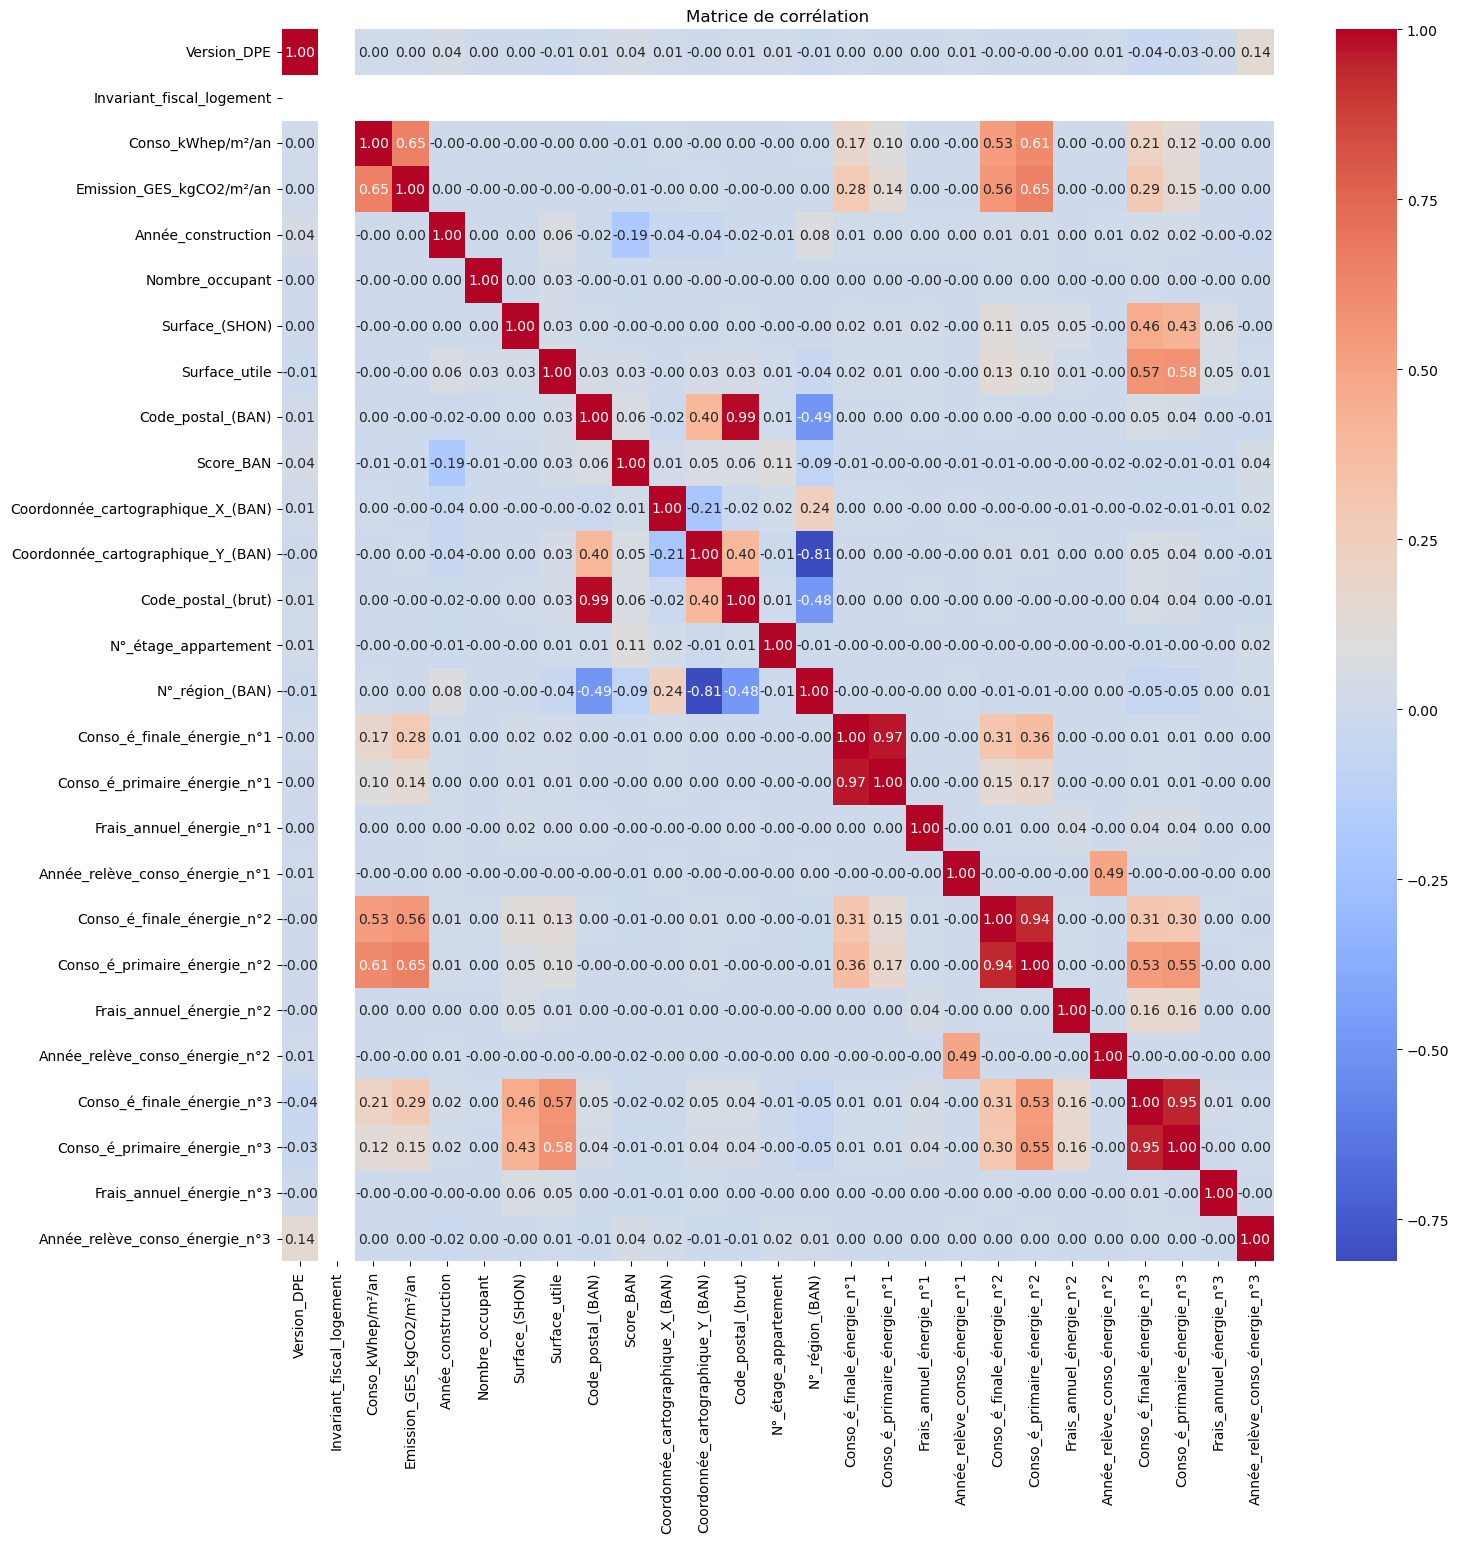

In [109]:
plt.figure(figsize=(16,16))
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()

Colonnes disponibles dans le DataFrame :
Index(['N°DPE', 'Date_réception_DPE', 'Date_établissement_DPE',
       'Date_visite_diagnostiqueur', 'Modèle_DPE', 'N°_DPE_remplacé',
       'Date_fin_validité_DPE', 'Version_DPE', 'N°_DPE_immeuble_associé',
       'Méthode_du_DPE', 'N°_immatriculation_copropriété',
       'Invariant_fiscal_logement', 'Etiquette_DPE', 'Etiquette_GES',
       'Conso_kWhep/m²/an', 'Emission_GES_kgCO2/m²/an', 'Année_construction',
       'Catégorie_ERP', 'Période_construction', 'Secteur_activité',
       'Nombre_occupant', 'Surface_(SHON)', 'Surface_utile',
       'Type_énergie_principale_chauffage', 'Adresse_brute',
       'Nom__commune_(BAN)', 'Code_INSEE_(BAN)', 'N°_voie_(BAN)',
       'Identifiant__BAN', 'Adresse_(BAN)', 'Code_postal_(BAN)', 'Score_BAN',
       'Nom__rue_(BAN)', 'Coordonnée_cartographique_X_(BAN)',
       'Coordonnée_cartographique_Y_(BAN)', 'Code_postal_(brut)',
       'N°_étage_appartement', 'Nom_résidence',
       'Complément_d'adresse_bâtim

C:\Users\Gilles2608\AppData\Local\Temp\ipykernel_12532\1742715396.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='N°_région_(BAN)', y='Conso_kWhep/m²/an', data=data_aggregated, palette="viridis")


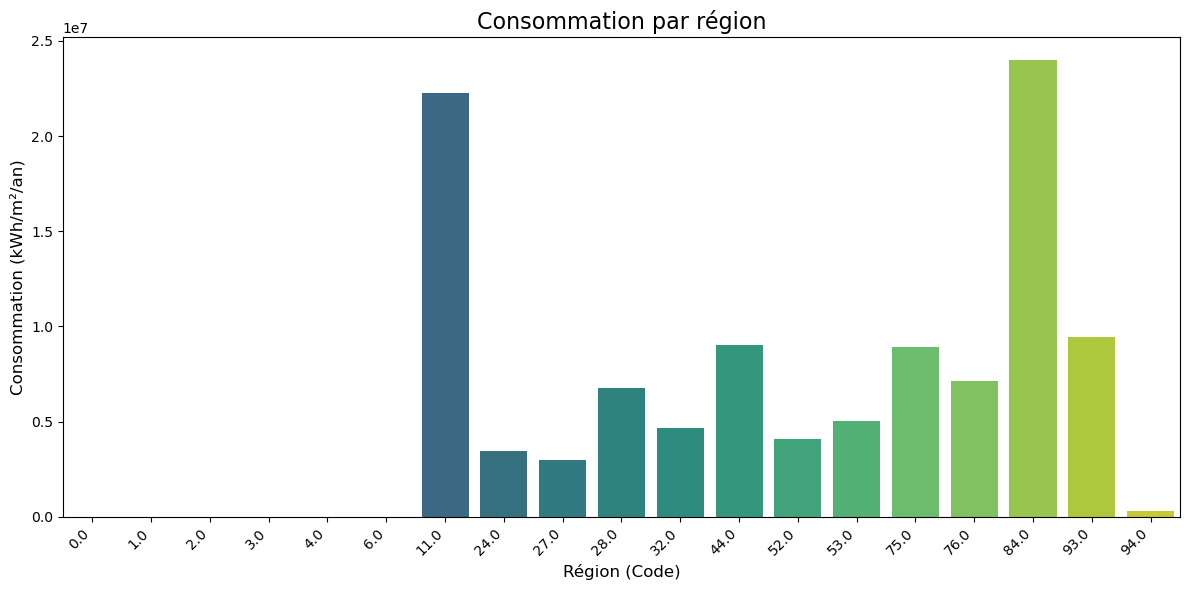

In [12]:
# Vérification des colonnes du DataFrame
print("Colonnes disponibles dans le DataFrame :")
print(df.columns)

# Vérification si les colonnes nécessaires existent
if 'N°_région_(BAN)' in df.columns and 'Conso_kWhep/m²/an' in df.columns:
    # Agréger les données par région pour obtenir la consommation totale par région
    data_aggregated = df.groupby('N°_région_(BAN)')['Conso_kWhep/m²/an'].sum().reset_index()

    # Afficher les données agrégées
    print("\nDonnées agrégées par région :")
    print(data_aggregated)

    # Créer un graphique à barres verticales
    plt.figure(figsize=(12, 6))
    sns.barplot(x='N°_région_(BAN)', y='Conso_kWhep/m²/an', data=data_aggregated, palette="viridis")

    # Ajouter un titre et des étiquettes
    plt.title('Consommation par région', fontsize=16)
    plt.xlabel('Région (Code)', fontsize=12)
    plt.ylabel('Consommation (kWh/m²/an)', fontsize=12)

    # Rotation des labels sur l'axe x pour plus de lisibilité si nécessaire
    plt.xticks(rotation=45, ha="right")

    # Afficher le graphique
    plt.tight_layout()
    plt.show()

else:
    print("Les colonnes nécessaires ('N°_région_(BAN)', 'Conso_kWhep/m²/an') sont manquantes dans le DataFrame.")


In [14]:
# Étape 1 : Affichage des valeurs manquantes par colonne et leur pourcentage
missing_data = df.isnull().sum()

# Convertir en DataFrame pour appliquer le style
missing_data_df = missing_data.to_frame().reset_index()
missing_data_df.columns = ['Colonne', 'Valeurs manquantes']

# Calculer le pourcentage de valeurs manquantes par colonne
missing_percentage = missing_data / len(df) * 100
missing_data_df['Pourcentage manquant'] = missing_percentage

# Étape 2 : Identifier les colonnes avec plus de 50% de valeurs manquantes
columns_to_drop = missing_percentage[missing_percentage > 50].index

# Étape 3 : Ajouter une colonne pour indiquer les colonnes supprimées
missing_data_df['Suppression'] = missing_data_df['Colonne'].apply(lambda x: 'Oui' if x in columns_to_drop else 'Non')

# Appliquer le style pour mettre en surbrillance les colonnes avec des valeurs manquantes
styled_missing_data = missing_data_df.style.applymap(lambda x: 'background-color: yellow' if isinstance(x, (int, float)) and x > 0 else '', subset=['Valeurs manquantes'])

# Affichage du tableau avec toutes les informations
print("\n❌ Valeurs manquantes par colonne (avant remplacement) :")
display(styled_missing_data)





❌ Valeurs manquantes par colonne (avant remplacement) :


C:\Users\Gilles2608\AppData\Local\Temp\ipykernel_12532\2120468295.py:19: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_missing_data = missing_data_df.style.applymap(lambda x: 'background-color: yellow' if isinstance(x, (int, float)) and x > 0 else '', subset=['Valeurs manquantes'])


,Colonne,Valeurs manquantes,Pourcentage manquant,Suppression
0,N°DPE,0,nan,Non
1,Date_réception_DPE,0,nan,Non
2,Date_établissement_DPE,0,nan,Non
3,Date_visite_diagnostiqueur,0,nan,Non
4,Modèle_DPE,0,nan,Non
5,N°_DPE_remplacé,339379,nan,Oui
6,Date_fin_validité_DPE,0,nan,Non
7,Version_DPE,0,nan,Non
8,N°_DPE_immeuble_associé,365097,nan,Oui
9,Méthode_du_DPE,7499,nan,Non


In [141]:
# Étape 2 : Identifier les colonnes avec plus de 50% de valeurs manquantes
missing_percentage = df.isnull().sum() / len(df) * 100  # Calcul du pourcentage de valeurs manquantes

# Sélectionner les colonnes où le pourcentage de valeurs manquantes est supérieur à 50%
columns_to_drop = missing_percentage[missing_percentage > 50]

# Convertir les résultats en DataFrame pour une meilleure visualisation
columns_to_drop_df = columns_to_drop.to_frame().reset_index()
columns_to_drop_df.columns = ['Colonne', 'Pourcentage manquant']
columns_to_drop_df['Suppression'] = columns_to_drop_df['Pourcentage manquant'].apply(lambda x: 'Oui' if x > 50 else 'Non')

# Afficher le tableau avec les colonnes à supprimer
print("\nTableau des colonnes avec plus de 50% de valeurs manquantes :")
display(columns_to_drop_df)



Tableau des colonnes avec plus de 50% de valeurs manquantes :


,Colonne,Pourcentage manquant,Suppression
0,N°_DPE_remplacé,92.497401,Oui
1,N°_DPE_immeuble_associé,99.691163,Oui
2,N°_immatriculation_copropriété,99.628141,Oui
3,Invariant_fiscal_logement,100.000000,Oui
4,Type_énergie_principale_chauffage,89.880647,Oui
5,Nom_résidence,89.897373,Oui
6,Cage_d'escalier,99.031971,Oui
7,Complément_d'adresse_logement,62.061086,Oui
8,Année_relève_conso_énergie_n°1,50.445036,Oui
9,Conso_é_finale_énergie_n°2,78.453961,Oui


In [174]:
columns_to_drop= columns_to_drop_df["Colonne"].iloc[:8].to_list()
columns_to_drop.append("Complément_d'adresse_bâtiment")
columns_to_drop.append("N°_étage_appartement")

In [176]:
columns_to_drop

['N°_DPE_remplacé',
 'N°_DPE_immeuble_associé',
 'N°_immatriculation_copropriété',
 'Invariant_fiscal_logement',
 'Type_énergie_principale_chauffage',
 'Nom_résidence',
 "Cage_d'escalier",
 "Complément_d'adresse_logement",
 "Complément_d'adresse_bâtiment",
 'N°_étage_appartement']

In [178]:
 df.drop(columns=columns_to_drop,inplace = True)

#### Imputation des valeurs manquantes

In [198]:
col_obj = df.select_dtypes(include=["object"]).columns
data_num = df.drop(columns = col_obj)
data_num.head()

,Version_DPE,Conso_kWhep/m²/an,Emission_GES_kgCO2/m²/an,Année_construction,Nombre_occupant,Surface_(SHON),Surface_utile,Code_postal_(BAN),Score_BAN,Coordonnée_cartographique_X_(BAN),...,Frais_annuel_énergie_n°1,Année_relève_conso_énergie_n°1,Conso_é_finale_énergie_n°2,Conso_é_primaire_énergie_n°2,Frais_annuel_énergie_n°2,Année_relève_conso_énergie_n°2,Conso_é_finale_énergie_n°3,Conso_é_primaire_énergie_n°3,Frais_annuel_énergie_n°3,Année_relève_conso_énergie_n°3
0,2.3,115.0,3.2,1900.0,500.0,NaN,120.0,35000.0,0.76,351568.07,...,991.1,2022.0,6000.0,13800.0,991.1,2023.0,NaN,NaN,NaN,NaN
1,2.1,36.3,1.0,1990.0,500.0,NaN,95.0,66200.0,0.58,698001.77,...,307.9,2020.0,1400.0,3220.0,269.4,2021.0,NaN,NaN,NaN,NaN
2,2.3,NaN,NaN,NaN,0.0,145.0,100.0,44100.0,0.82,354222.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.1,NaN,NaN,2006.0,1.0,2405.0,100.0,57280.0,0.68,929371.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.4,NaN,NaN,NaN,0.0,37.3,100.0,6530.0,0.59,1010210.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
##### Détection des valeurs abérrantes en utilisant la règles de l'écart interquantile (IQR)
def valeurs_aberrantes(df): 
    val_aberrantes = []
    for col in data_num.columns:
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25) #Ecart interquantile
        bi = df[col].quantile(0.25) - 1.5*IQR # Borne inférieure
        bs = df[col].quantile(0.75) + 1.5*IQR # Borne supérieure
        nbr_valeurs_aberrates = df[(df[col] < bi) | (df[col] > bs)].shape[0] # Nombre de valeurs aberrantes
        taux = (nbr_valeurs_aberrates / df.shape[0]) * 100  # Taux en pourcentage
        if nbr_valeurs_aberrates > 0:
            val_aberrantes.append([col, nbr_valeurs_aberrates, round(taux, 2)])  # Arrondi à 2 décimales
    return pd.DataFrame(data = val_aberrantes, columns = ["columns", "Nbre_valeurs_aberrantes","taux_valeurs_aberrantes (%)"])

In [202]:
val_aberrantes = valeurs_aberrantes(data_num)
val_aberrantes

,columns,Nbre_valeurs_aberrantes,taux_valeurs_aberrantes (%)
0,Version_DPE,24622,7.38
1,Conso_kWhep/m²/an,12335,3.70
2,Emission_GES_kgCO2/m²/an,15777,4.73
3,Année_construction,2888,0.87
4,Nombre_occupant,77422,23.20
5,Surface_(SHON),38533,11.55
6,Surface_utile,115780,34.69
7,Score_BAN,232,0.07
8,Coordonnée_cartographique_X_(BAN),195,0.06
9,Coordonnée_cartographique_Y_(BAN),76,0.02


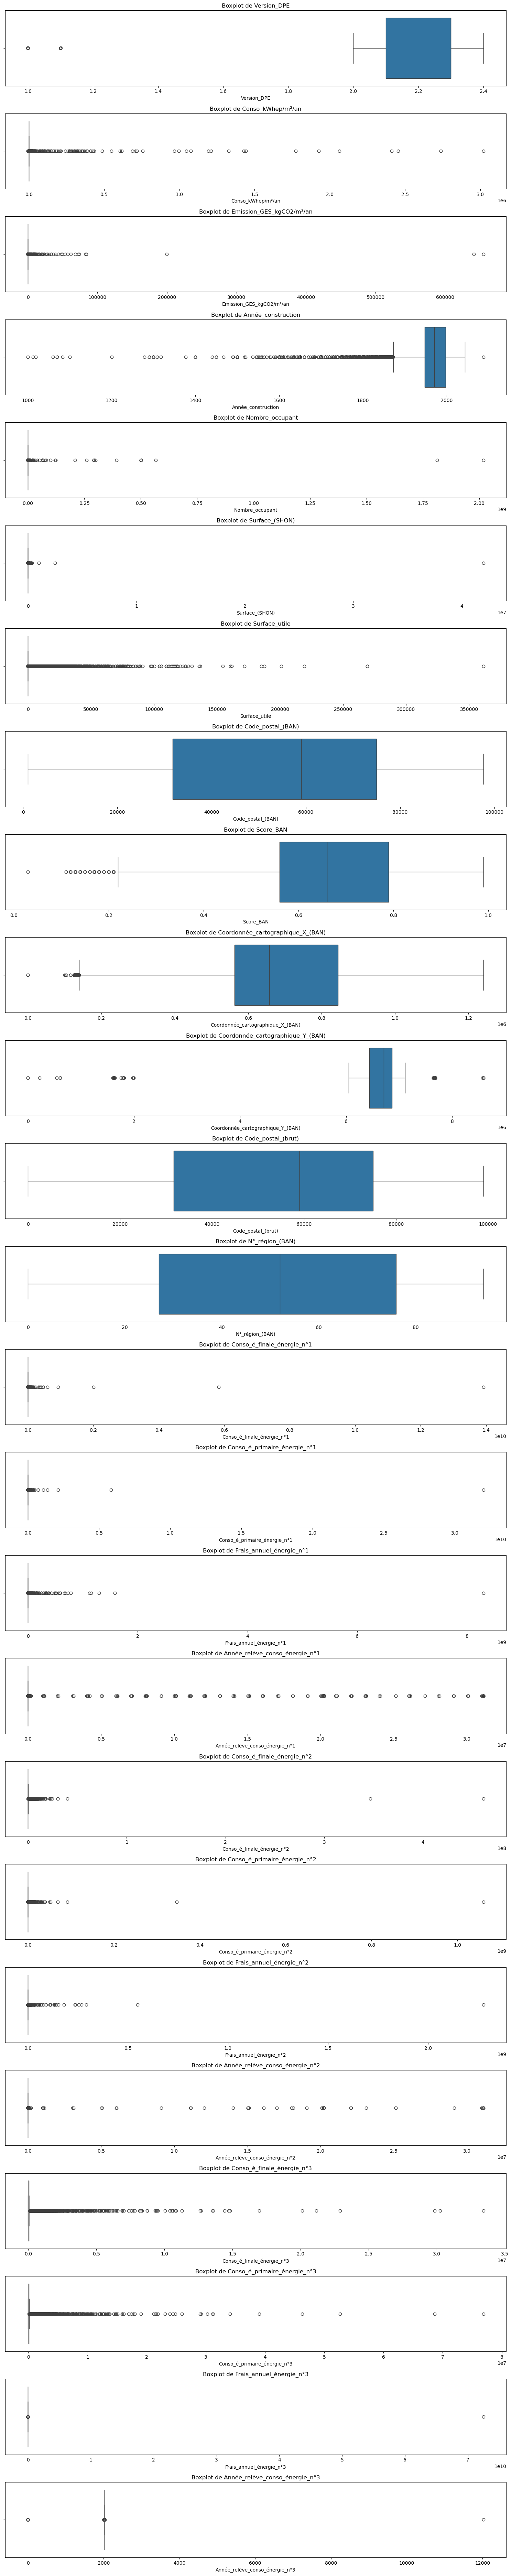

In [204]:
##### Observation graphique
col_num = data_num.columns

# Tracer un boxplot pour chaque colonne numérique
plt.figure(figsize=(15, len(col_num) * 3))  # Ajuster la taille du graphique
for i, col in enumerate(col_num, 1):
    plt.subplot(len(col_num), 1, i)
    sns.boxplot(x=data_num[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()

In [206]:
def remplacer_valeurs_aberrantes(df, liste_colonnes):
    # Calcul des bornes de détection des valeurs aberrantes
    Q1 = df[col].quantile(0.25)  # Premier quartile
    Q3 = df[col].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1  # Écart interquartile
    
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR
    
    # Remplacement des valeurs aberrantes par NaN
    for col in liste_colonnes:
        df.loc[(df[col] < borne_inf) | (df[col] > borne_sup), col] = np.nan

    return df


In [212]:
list_colonnes = ["Surface_(SHON)","Nombre_occupant"]
df = remplacer_valeurs_aberrantes(df, list_colonnes)

In [224]:
df.loc[df["Année_construction"] == df["Année_construction"].max(), "Année_construction"] = df["Année_construction"].median()

In [254]:
df.columns

Index(['N°DPE', 'Date_réception_DPE', 'Date_établissement_DPE',
       'Date_visite_diagnostiqueur', 'Modèle_DPE', 'Date_fin_validité_DPE',
       'Version_DPE', 'Méthode_du_DPE', 'Etiquette_DPE', 'Etiquette_GES',
       'Conso_kWhep/m²/an', 'Emission_GES_kgCO2/m²/an', 'Année_construction',
       'Catégorie_ERP', 'Période_construction', 'Secteur_activité',
       'Nombre_occupant', 'Surface_(SHON)', 'Surface_utile', 'Adresse_brute',
       'Nom__commune_(BAN)', 'Code_INSEE_(BAN)', 'N°_voie_(BAN)',
       'Identifiant__BAN', 'Adresse_(BAN)', 'Code_postal_(BAN)', 'Score_BAN',
       'Nom__rue_(BAN)', 'Coordonnée_cartographique_X_(BAN)',
       'Coordonnée_cartographique_Y_(BAN)', 'Code_postal_(brut)',
       'Statut_géocodage', 'Nom__commune_(Brut)', 'N°_département_(BAN)',
       'N°_région_(BAN)', 'Conso_é_finale_énergie_n°1',
       'Conso_é_primaire_énergie_n°1', 'Type_énergie_n°1',
       'Type_usage_énergie_n°1', 'Frais_annuel_énergie_n°1',
       'Année_relève_conso_énergie_n°1',

In [160]:
df.loc[df["Adresse_(BAN)"].isna(), ["Adresse_brute", "Adresse_(BAN)", "N°_département_(BAN)", "N°_région_(BAN)"]]

,Adresse_brute,Adresse_(BAN),N°_département_(BAN),N°_région_(BAN)
4603,89 COURS JULIEN / 1 RUE TROIS FRERES BARTHELEMY,NaN,NaN,NaN
12576,",ROUTE D ORLEANS",NaN,NaN,NaN
46558,BOULEVARD SAINT VINCENT DE PAUL\nZONE COMMERCI...,NaN,NaN,NaN
223933,(appartement) 22 Rue de la Constitution,NaN,NaN,NaN
234448,(Local commercial) 22 Rue du Tripot,NaN,NaN,NaN
...,...,...,...,...
91564,Quai Louis Blanc,NaN,NaN,NaN
364402,43 PLACE GENERAL DE GAULLE- LOCAL COMMERCIALE-,NaN,NaN,NaN
87706,"300 Rue Auguste Broussonnet, Espace St Charles...",NaN,NaN,NaN
36269,LA FERME DU VERGER\nECOLE,NaN,NaN,NaN


In [196]:
df[['Surface_(SHON)', 'Surface_utile']]

,Surface_(SHON),Surface_utile
0,NaN,120.0
1,NaN,95.0
2,145.0,100.0
3,2405.0,100.0
4,37.3,100.0
...,...,...
333730,647.0,100.0
333731,1725.9,1725.9
333732,67.0,100.0
333733,3900.0,3900.0


In [232]:
#### Le taux de valeurs manquantes dans les colonnes Adresse_(BAN), Adresse_brute étant très faible, > 1% nous pouvons juste 
#### supprimer ces données: 
df = df.dropna(subset=["Adresse_(BAN)", "Adresse_brute", "N°_département_(BAN)","Code_postal_(BAN)","Nom__commune_(Brut)"]).reset_index(drop=True)

df["N°_voie_(BAN)"] = df["N°_voie_(BAN)"].fillna(df["N°_voie_(BAN)"].mode()[0])
df["Nom__rue_(BAN)"] = df["Nom__rue_(BAN)"].fillna(df["Nom__rue_(BAN)"].mode()[0])


In [226]:
df["Nombre_occupant"] = df["Nombre_occupant"].fillna(df["Nombre_occupant"].median())

In [228]:
df["Surface_(SHON)"] = df["Surface_(SHON)"].fillna(df["Surface_(SHON)"].median())

In [238]:
df["Catégorie_ERP"] = df["Catégorie_ERP"].fillna(df["Catégorie_ERP"].mode()[0])

In [244]:
df["Méthode_du_DPE"] = df["Méthode_du_DPE"].fillna(df["Méthode_du_DPE"].mode()[0])

In [246]:
df.isna().sum()

N°DPE                                     0
Date_réception_DPE                        0
Date_établissement_DPE                    0
Date_visite_diagnostiqueur                0
Modèle_DPE                                0
Date_fin_validité_DPE                     0
Version_DPE                               0
Méthode_du_DPE                            0
Etiquette_DPE                        154228
Etiquette_GES                        154228
Conso_kWhep/m²/an                    154229
Emission_GES_kgCO2/m²/an             154228
Année_construction                   152192
Catégorie_ERP                             0
Période_construction                      0
Secteur_activité                          0
Nombre_occupant                           0
Surface_(SHON)                            0
Surface_utile                             0
Adresse_brute                             0
Nom__commune_(BAN)                        0
Code_INSEE_(BAN)                          0
N°_voie_(BAN)                   

In [256]:
##### Changement des noms des colonnes du dataset
data = df.copy()

In [258]:
data.columns = [
    'num_dpe', 'date_reception_dpe', 'date_etablissement_dpe',
    'date_visite_diagnostiqueur', 'modele_dpe', 'date_fin_validite_dpe',
    'version_dpe', 'methode_dpe', 'etiquette_dpe', 'etiquette_ges',
    'conso_kwhep_m2_an', 'emission_ges_kgco2_m2_an', 'annee_construction',
    'categorie_erp', 'periode_construction', 'secteur_activite',
    'nombre_occupants', 'surface_shon', 'surface_utile', 'adresse_brute',
    'nom_commune_ban', 'code_insee_ban', 'num_voie_ban',
    'identifiant_ban', 'adresse_ban', 'code_postal_ban', 'score_ban',
    'nom_rue_ban', 'coord_x_ban', 'coord_y_ban', 'code_postal_brut',
    'statut_geocodage', 'nom_commune_brut', 'num_departement_ban',
    'num_region_ban', 'conso_finale_energie_1',
    'conso_primaire_energie_1', 'type_energie_1',
    'type_usage_energie_1', 'frais_annuel_energie_1',
    'annee_releve_conso_energie_1', 'conso_finale_energie_2',
    'conso_primaire_energie_2', 'type_energie_2',
    'type_usage_energie_2', 'frais_annuel_energie_2',
    'annee_releve_conso_energie_2', 'conso_finale_energie_3',
    'conso_primaire_energie_3', 'type_energie_3',
    'type_usage_energie_3', 'frais_annuel_energie_3',
    'annee_releve_conso_energie_3'
]


In [262]:
data.columns

Index(['num_dpe', 'date_reception_dpe', 'date_etablissement_dpe',
       'date_visite_diagnostiqueur', 'modele_dpe', 'date_fin_validite_dpe',
       'version_dpe', 'methode_dpe', 'etiquette_dpe', 'etiquette_ges',
       'conso_kwhep_m2_an', 'emission_ges_kgco2_m2_an', 'annee_construction',
       'categorie_erp', 'periode_construction', 'secteur_activite',
       'nombre_occupants', 'surface_shon', 'surface_utile', 'adresse_brute',
       'nom_commune_ban', 'code_insee_ban', 'num_voie_ban', 'identifiant_ban',
       'adresse_ban', 'code_postal_ban', 'score_ban', 'nom_rue_ban',
       'coord_x_ban', 'coord_y_ban', 'code_postal_brut', 'statut_geocodage',
       'nom_commune_brut', 'num_departement_ban', 'num_region_ban',
       'conso_finale_energie_1', 'conso_primaire_energie_1', 'type_energie_1',
       'type_usage_energie_1', 'frais_annuel_energie_1',
       'annee_releve_conso_energie_1', 'conso_finale_energie_2',
       'conso_primaire_energie_2', 'type_energie_2', 'type_usage_energ

In [264]:
data.to_csv("dpe-v2-tertiaire-2_nettoye.csv", index=False)

In [252]:
from sqlalchemy import create_engine

In [266]:

# Paramètres de connexion à PostgreSQL
host = "localhost"  # ou l'IP du serveur PostgreSQL
database = "Projet_DPE"
user = "postgres"
password = "challenge"
table_name = "DPE_Tetiaire"

# Créer une connexion à PostgreSQL
engine = create_engine(f"postgresql://{user}:{password}@{host}/{database}")

# Enregistrement du DataFrame dans PostgreSQL
data.to_sql(table_name, engine, if_exists="replace", index=False)

print("Dataset enregistré avec succès dans la base de données PostgreSQL !")

Dataset enregistré avec succès dans la base de données PostgreSQL !
